In [37]:
import pencil as pc
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

PLOT_DIR = Path.cwd()
PROJECT_ROOT = PLOT_DIR.parent
RUNS_DIR = PROJECT_ROOT / "runs"
print(f"Project root directory: {PROJECT_ROOT}")

Project root directory: /home/mgurgeni/programming/ai_turbulence/pencil-code


In [38]:
path = RUNS_DIR / "H32k4a"
SIMS =  pc.get_sim(path)

In [39]:
# reading spectral lines
specra = pc.read.power(datadir=SIMS.datadir)

appending lr
appending o
appending hel_kin
appending hel_mag
appending krms
appending mag
appending kin
power_lr.dat
powero.dat
powerhel_kin.dat
powerhel_mag.dat
power_krms.dat
power_mag.dat
power_kin.dat


In [40]:
specra_kin = specra.kin

In [41]:
specra_kin.shape
specra.krms

array([ 0.  ,  1.29,  2.24,  3.14,  4.07,  5.11,  6.13,  7.08,  8.03,
        9.06, 10.1 , 11.1 , 12.  , 13.  , 14.1 , 15.  ], dtype=float32)

In [42]:
specra.keys()

t
lr
o
hel_kin
hel_mag
krms
mag
kin


Text(0, 0.5, 'Kinetic Energy Spectrum E(k)')

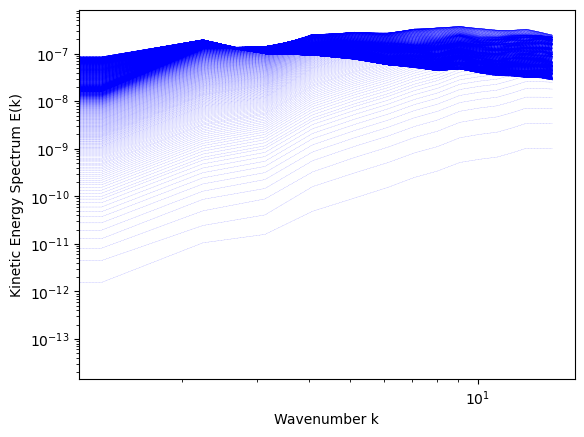

In [43]:
for line in specra_kin:
    plt.loglog(specra.krms, line, alpha=0.5, color='blue' , linewidth=0.2, linestyle="--")
plt.xlabel('Wavenumber k')
plt.ylabel('Kinetic Energy Spectrum E(k)')

In [ ]:
## Read multiple 


vars_nemas = []
try:
    with open(path/"data"/"proc0"/"varN.list","r") as f:
        for line in f:
            vars_nemas.append(line.strip().split())


except FileNotFoundError:
    print("File not found: varN.list")

print(vars_nemas)


var_files =[]
for var,t in vars_nemas :
    vars_i = pc.read.var(datadir=SIMS.datadir, var_file=f'{var}', quiet=True, trimall=True)
    print(f"t {t}")
    var_files.append(vars_i)

[['VAR0', '0.00000000E+00'], ['VAR1', '0.50029946E+02'], ['VAR2', '0.10001617E+03'], ['VAR3', '0.15006208E+03'], ['VAR4', '0.20007831E+03'], ['VAR5', '0.25004072E+03'], ['VAR6', '0.30009693E+03'], ['VAR7', '0.35007328E+03'], ['VAR8', '0.40005424E+03'], ['VAR9', '0.45004971E+03'], ['VAR10', '0.50006814E+03'], ['VAR11', '0.55000631E+03'], ['VAR12', '0.60005041E+03'], ['VAR13', '0.65008168E+03'], ['VAR14', '0.70000494E+03'], ['VAR15', '0.75004146E+03'], ['VAR16', '0.80009358E+03'], ['VAR17', '0.85005075E+03']]


/home/mgurgeni/pencil-code/python/pencil/read/varfile.py:788: UserWarning:

Given a dtype which is not unsigned.



object completed in 5.37 seconds.
object completed in 5.40 seconds.
object completed in 5.33 seconds.
object completed in 5.40 seconds.
object completed in 5.52 seconds.
object completed in 5.60 seconds.
object completed in 5.64 seconds.
object completed in 5.63 seconds.
object completed in 5.96 seconds.
object completed in 5.71 seconds.
object completed in 5.52 seconds.
object completed in 5.53 seconds.
object completed in 5.47 seconds.
object completed in 5.55 seconds.
object completed in 5.65 seconds.
object completed in 5.64 seconds.
object completed in 5.45 seconds.
object completed in 5.55 seconds.


In [32]:
vars = np.asanyarray(vars)
vars.shape

(110,)

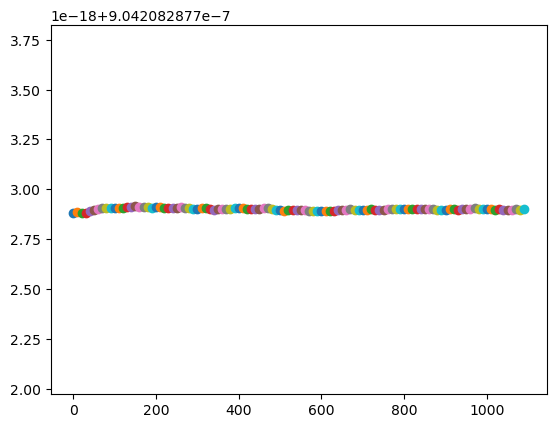

In [ ]:
for i  in var_files :
    plt.plot(i.t, i.uu.rms(), 'o')

In [35]:
snapshots = []

for v in vars:     # vars already contains 4 fully assembled snapshots
    uu    = np.asarray(v.uu)       # shape (3,1,1,256)
    lnrho = np.asarray(v.lnrho)    # shape (1,1,256)
    t     = float(v.t)

    # Velocity components extracted correctly
    ux = uu[0].ravel()   # 256 points
    uy = uu[1].ravel()   # 256 points
    uz = uu[2].ravel()   # 256 points

    rho = lnrho.ravel()  # 256 points

    state = np.concatenate([
        np.array([t]),
        ux, uy, uz,
        rho
    ])

    snapshots.append(state)

snapshots = np.vstack(snapshots)
print("snapshots shape:", snapshots.shape)


snapshots shape: (110, 1025)


In [36]:
# You already had:
# PLOT_DIR = Path.cwd()
# PROJECT_ROOT = PLOT_DIR.parent        # -> pencil-code
# RUNS_DIR = PROJECT_ROOT / "hydro_runs"

AIP_ROOT     = PROJECT_ROOT.parent      # -> ai_turbulence
BACKEND_DATA = AIP_ROOT /"aipoincare" / "backend" / "data"
BACKEND_DATA.mkdir(parents=True, exist_ok=True)

txt_path = BACKEND_DATA / "1D_Kol256_uu_lnrho_4snapshots.txt"
npy_path = BACKEND_DATA / "1D_Kol256_uu_lnrho_4snapshots.npy"

np.savetxt(txt_path, snapshots)
np.save(npy_path, snapshots)

print("Saved TEXT to:", txt_path)
print("Saved NPY  to:", npy_path)


Saved TEXT to: /home/mgurgeni/programming/ai_turbulence/aipoincare/backend/data/1D_Kol256_uu_lnrho_4snapshots.txt
Saved NPY  to: /home/mgurgeni/programming/ai_turbulence/aipoincare/backend/data/1D_Kol256_uu_lnrho_4snapshots.npy
